In [54]:
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from data_loader import SRCNN_dataset
from model import SRCNN
from solver import train
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

train_config = {
    'dir_path': 'Train',
    'scale': 3,
    'is_gray': True,
    'input_size': 33,
    'label_size': 21,
    'stride': 21
}

test_config = train_config.copy()
test_config['dir_path'] = 'Test/Set5'

train_dataset = SRCNN_dataset(train_config)
model = SRCNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model = train(train_dataset, model, loss_fn, 
      optimizer, num_epochs=10, batch_size=128)



Epoch 1, iter     0, loss 0.21404
Epoch 1, iter    10, loss 0.14476
Epoch 1, iter    20, loss 0.08004
Epoch 1, iter    30, loss 0.02450
Epoch 1, iter    40, loss 0.01085
Epoch 1, iter    50, loss 0.01210
Epoch 1, iter    60, loss 0.01040
Epoch 1, iter    70, loss 0.00902
Epoch 2, iter     0, loss 0.00831
Epoch 2, iter    10, loss 0.00912
Epoch 2, iter    20, loss 0.00659
Epoch 2, iter    30, loss 0.00617
Epoch 2, iter    40, loss 0.00643
Epoch 2, iter    50, loss 0.00534
Epoch 2, iter    60, loss 0.00556
Epoch 2, iter    70, loss 0.00442
Epoch 3, iter     0, loss 0.00529
Epoch 3, iter    10, loss 0.00562
Epoch 3, iter    20, loss 0.00525
Epoch 3, iter    30, loss 0.00524
Epoch 3, iter    40, loss 0.00395
Epoch 3, iter    50, loss 0.00421
Epoch 3, iter    60, loss 0.00388
Epoch 3, iter    70, loss 0.00356
Epoch 4, iter     0, loss 0.00460
Epoch 4, iter    10, loss 0.00351
Epoch 4, iter    20, loss 0.00393
Epoch 4, iter    30, loss 0.00464
Epoch 4, iter    40, loss 0.00431
Epoch 4, iter 

(255, 255)


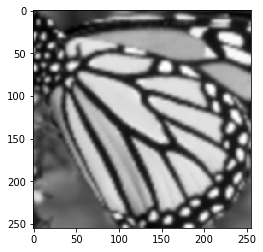

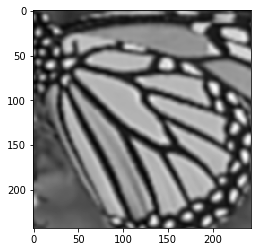

In [52]:
import torch
from torch.autograd import Variable
%matplotlib inline

paths = get_image_paths('Test/Set5')
image = imread(paths[2])
test_sample, test_label = process_image(image)
h, w = test_sample.shape
print(h, w)
test_input = test_sample.reshape(1, h, w, 1)
test_input = test_input.transpose(0, 3, 1, 2)
test_input = torch.Tensor(test_input)
test_input = Variable(test_input)
test_output = model(test_input)

test_output = test_output.data.numpy()
test_output = test_output[0].transpose(1, 2, 0)
h, w = test_output.shape[0], test_output.shape[1]
test_output = test_output.reshape(h, w)


plt.imshow(test_sample, cmap='gray')
plt.pause(0.005)
plt.imshow(test_output, cmap='gray')